In [1]:
import pandas as pd # Importing modules for use.
import numpy as np
import matplotlib.pyplot as plt # FOr plotting scatter plot

# Decision Tree Classification

In [2]:
data = pd.read_csv('Altman_Z_2D.csv') # Load the .csv data

In [3]:
data.head(5) # Taking a look at the data.

,Bankrupt,EBIT/Total Assets,MktValEquity/Debt
0,False,27.693875,8.415582
1,False,-14.302305,8.878080
2,True,-20.515623,-8.742365
3,False,29.729424,4.878042
4,False,32.856383,1.107730


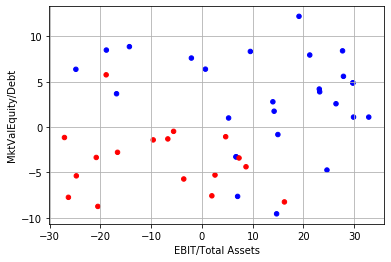

In [4]:
colours = np.where(data['Bankrupt'], 'r', 'b') # here we define separate colours for True and False
data.plot.scatter(x='EBIT/Total Assets', y='MktValEquity/Debt', c = colours, grid='on'); # Specify X and Y in Scatterplots

In [5]:
# Split up the data for the classifier to be trained.
# X is data 
# Y is the answer we want our classifier to replicate.
X = data[['EBIT/Total Assets','MktValEquity/Debt']]
Y = data['Bankrupt']

In [6]:
# Import scikitlearn
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2) # create a DecisionTreeClassifier object first
tree_clf.fit(X, Y) # Fit the decision tree to our training data of X and Y.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
# Let's see if it predicts bankruptcy for a bad company
print('Low EBIT/Total Assets and MktValEquity/Debt company go bust?', tree_clf.predict([[-20, -10]]))

# Let's try this for a highly values, high earning company
print('High EBIT/Total Assets and MktValEquity/Debt company go bust?', tree_clf.predict([[20, 10]]))

Low EBIT/Total Assets and MktValEquity/Debt company go bust? [ True]
High EBIT/Total Assets and MktValEquity/Debt company go bust? [False]


Text(0, 0.5, 'MktValEquity/Debt')

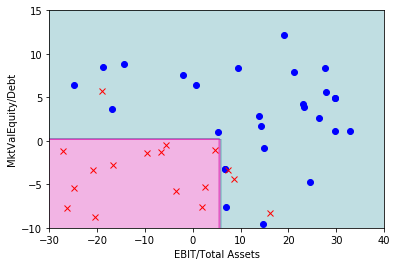

In [8]:
# Contour plot. 
from matplotlib.colors import ListedColormap
x1s = np.linspace(-30, 40, 100)
x2s = np.linspace(-10, 15, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).astype(int).reshape(x1.shape)
custom_cmap = ListedColormap(['#2F939F','#D609A8'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X['EBIT/Total Assets'][Y==False], X['MktValEquity/Debt'][Y==False], "bo",
         X['EBIT/Total Assets'][Y==True], X['MktValEquity/Debt'][Y==True], "rx")
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')

In [9]:
tree_clf.predict(X_new).astype(int)

array([1, 1, 1, ..., 0, 0, 0])

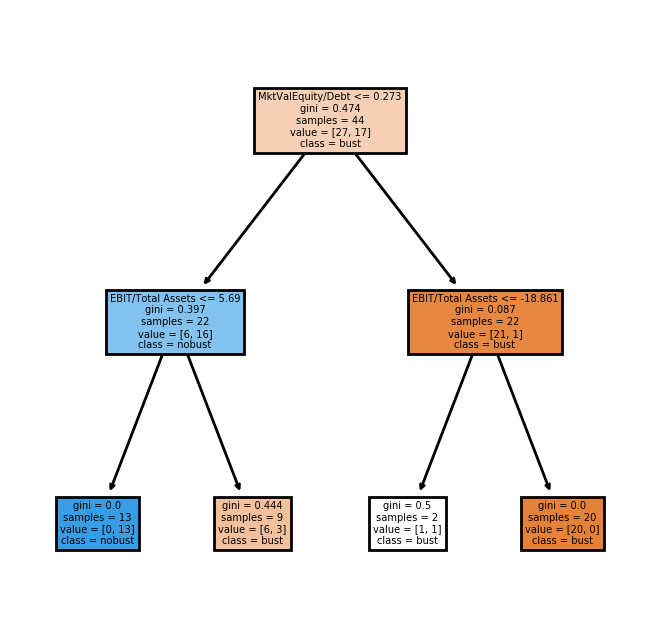

In [10]:
from sklearn import tree # Need this to see decision tree.
plt.figure(figsize=(4,4), dpi=200) # set figsize so we can see it
tree.plot_tree(tree_clf,
           feature_names = ['EBIT/Total Assets','MktValEquity/Debt'], 
           class_names=['bust', 'nobust'],
           filled = True);  # semicolon here to supress output

In [11]:
#plt.savefig('tree.png')

# Test/train splitting

In [12]:
# Test/train splitting
from sklearn.model_selection import train_test_split # need to import
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

In [13]:
# Have a look at the train and test sets.
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (29, 2)
X_test: (15, 2)
y_train: (29,)
y_test: (15,)


In [14]:
tree_clf2 = DecisionTreeClassifier(max_depth=3) # create a DecisionTreeClassifier object first
tree_clf2.fit(X_train, y_train) # Fit the decision tree to our TRAINING data of X and Y.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

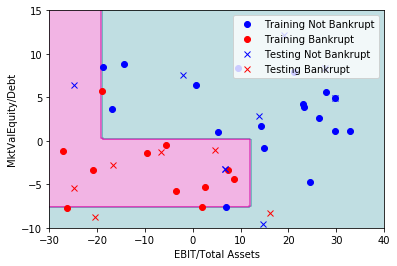

In [15]:
# Contour plot with scatter points of training and testing data
from matplotlib.colors import ListedColormap
x1s = np.linspace(-30, 40, 100)
x2s = np.linspace(-10, 15, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf2.predict(X_new).astype(int).reshape(x1.shape)
custom_cmap = ListedColormap(['#2F939F','#D609A8'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X_train['EBIT/Total Assets'][Y==False], X_train['MktValEquity/Debt'][Y==False], "bo",
         X_train['EBIT/Total Assets'][Y==True], X_train['MktValEquity/Debt'][Y==True], "ro",
         X_test['EBIT/Total Assets'][Y==False], X_test['MktValEquity/Debt'][Y==False], "bx",
         X_test['EBIT/Total Assets'][Y==True], X_test['MktValEquity/Debt'][Y==True], "rx")
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')
plt.legend(('Training Not Bankrupt', 'Training Bankrupt', 'Testing Not Bankrupt', 'Testing Bankrupt'), loc=1);

# Cross Validation and Measuring Classification Performance

In [16]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf2, X, Y, cv=3, scoring="accuracy")

In [17]:
print('Accuracy scores for the 3 models are:', scores)

Accuracy scores for the 3 models are: [0.66666667 0.8        0.71428571]


In [18]:
from sklearn.model_selection import cross_val_predict
scores = cross_val_predict(tree_clf2, X, Y, cv=3) # First get the predictions of Trues and Falses

from sklearn.metrics import confusion_matrix
confusion_matrix(scores, Y) # Compare these predictions with the known correct answers 

array([[23,  7],
       [ 4, 10]], dtype=int64)

# Hyperparameters, Underfitting and Overfitting

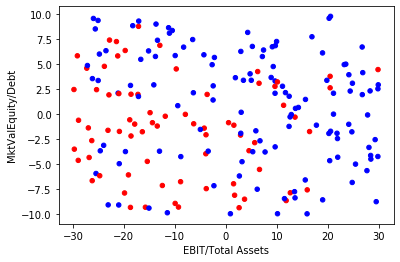

In [19]:
data = pd.read_csv('Altman_Z_2D_Large.csv', index_col=0) # Load the .csv data
colours = np.where(data['Bankrupt'], 'r', 'b') # here we define separate colours for True and False
data.plot.scatter(x='EBIT/Total Assets', y='MktValEquity/Debt', c = colours); # Have to specify X and Y in Scatterplots

In [20]:
X = data[['EBIT/Total Assets','MktValEquity/Debt']]
Y = data['Bankrupt']

from sklearn.model_selection import train_test_split # need to import
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=2) # 12345 is the password.

In [21]:
tree_clf = DecisionTreeClassifier(max_depth=6) # create a DecisionTreeClassifier object first
tree_clf.fit(X, Y) # Fit the decision tree to our training data of X and Y.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

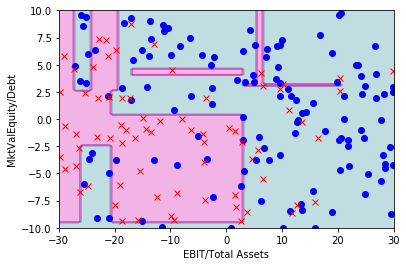

In [22]:
# Contour plot. 
from matplotlib.colors import ListedColormap
x1s = np.linspace(-30, 30, 100)
x2s = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).astype(int).reshape(x1.shape)
custom_cmap = ListedColormap(['#2F939F','#D609A8'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X['EBIT/Total Assets'][Y==False], X['MktValEquity/Debt'][Y==False], "bo",
         X['EBIT/Total Assets'][Y==True], X['MktValEquity/Debt'][Y==True], "rx")
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt');

# Exercise 7 on Decision Tree

In [23]:
# Oh no, Toby has messed up the code again. Try and get it working,
# I think some code is missing where "?" is placed.

In [24]:
'''
Here we want to plot the prediction accuracy with increasing decision tree depth
We want two accuracy lines plotted, one for accuracy vs. the testing set and
one for the accuracy vs the training set. 

We want to plot the tree depth from 1 to about 20.
We will loop through possible tree depth numbers, fitting our model with a different
tree depth with each loop, and appending the accuracy result to a list.

We will plot the list at the end.
'''


from sklearn.metrics import accuracy_score
scores_train, scores_test = [], ?
level = 20
for i in range(1, ?):
    tree_clf = DecisionTreeClassifier(max_depth=?) # create a DecisionTreeClassifier object first
    tree_clf.fit(?, y_train) # Fit the decision tree to our training data of X and Y.
    scores_train.append(?, y_train))
    scores_test.?(accuracy_score(tree_clf.predict(X_test), y_test)

plt.plot(range(1,level), scores_, range(1,?), scores_)
plt.legend(('Accuracy on Training Set','Accuracy on Testing Set'))
plt.grid()
#plt.xlabel('Decision Tree Depth')
plt.ylabel('Prediction Accuracy')

SyntaxError: invalid syntax (<ipython-input-24-86129b52f7e6>, line 15)